# Download Data

Download the BTC-USD Dataset from Perplexity Finance.

Save the file into the directory ./data/raw/

# Initialization

In [2]:
%load_ext dotenv
%dotenv 

# Mlflow

In [3]:
import os

In [4]:
import mlflow

#mlflow.set_tracking_uri("http://192.168.18.2:5001/")
mlflow.autolog()

# Adding MLflow's config for this experiment



In [5]:
#%pip install mplfinance
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


## Importing Dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import sys

import matplotlib.pyplot as plt
#import mplfinance as mpf


# Add the src directory to the path
src_dir = os.getenv('SRC_DIR')
if src_dir is None:
	# Fallback: assume notebooks folder is one level below project root
	project_root = os.path.dirname(os.getcwd())
	src_dir = os.path.join(project_root, 'src')

print(f"Adding to path: {src_dir}")
sys.path.append(src_dir)

from utils.logger import get_logger
_logs = get_logger(__name__)

2025/11/10 23:13:35 WARNING mlflow.utils.autologging_utils: MLflow statsmodels autologging is known to be compatible with 0.12.2 <= statsmodels <= 0.14.4, but the installed version is 0.14.5. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a compatible version, or try upgrading MLflow.
2025/11/10 23:13:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


Adding to path: ../src/


In [8]:
import hashlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import sys

# Load data
# Define ordered column names to enforce consistent schema (overrides original file header)
columns = [
    'Date',
    'Close',
    'Open',
    'High',
    'Low',
    'Volume'
]

# Read the raw CSV:
# - header=0 reads the first line (original names) but they are replaced by 'columns'
# - names=columns ensures consistent snake_case naming initialize above
#btc_dt = (pd.read_csv('dataset.csv', header = 0, names = columns))

# Save processed data to a new CSV folder and appeand file name with hash value

# Create a hash of the DataFrame
#df_hash = hashlib.md5(btc_dt.to_csv(index=False).encode()).hexdigest()
#processed_btc_file = "btc_processed.csv".replace(".csv", f"_{df_hash}.csv")
#btc_dt.to_csv(processed_btc_file, index=False)

# Log the completion of data loading and feature creation and record file name
#_logs.info("Loaded BTC-USD dataset into DataFrame.")
#_logs.info(f"Processed BTC-USD dataset saved to: {processed_btc_file}")

In [9]:
import hashlib

# Load data
# Define ordered column names to enforce consistent schema (overrides original file header)
columns = [
    'Date', 
    'Close',          
    'Open', 
    'High',                
    'Low', 
    'Volume'
]

btc_file = os.getenv("BTC_DATA")

# Read the raw CSV:
# - header=0 reads the first line (original names) but they are replaced by 'columns'
# - names=columns ensures consistent snake_case naming initialize above
btc_dt = (pd.read_csv(btc_file, header = 0, names = columns))

# Save processed data to a new CSV folder and appeand file name with hash value
    
# Create a hash of the DataFrame
df_hash = hashlib.md5(btc_dt.to_csv(index=False).encode()).hexdigest()
processed_btc_file = os.getenv("PROCESSED_BTC_DATA").replace(".csv", f"_{df_hash}.csv")
btc_dt.to_csv(processed_btc_file, index=False)

# Log the completion of data loading and feature creation and record file name
_logs.info("Loaded BTC-USD dataset into DataFrame.")
_logs.info(f"Processed BTC-USD dataset saved to: {processed_btc_file}")

2025-11-10 23:13:35,877, 2713969401.py, 29, INFO, Loaded BTC-USD dataset into DataFrame.
2025-11-10 23:13:35,878, 2713969401.py, 30, INFO, Processed BTC-USD dataset saved to: ../data/processed/btc_processed_8d4c513d70341c9eb8c09d7c4aa06be1.csv


# Exploratory Data Analysis

In [10]:
# Observe the data structure
btc_dt.info()

# Print the shape of the DataFrame
print(f"BTC-USD DataFrame shape: {btc_dt.shape}")
print("We don't have any null values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1827 non-null   object 
 1   Close   1827 non-null   float64
 2   Open    1827 non-null   float64
 3   High    1827 non-null   float64
 4   Low     1827 non-null   float64
 5   Volume  1827 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 85.8+ KB
BTC-USD DataFrame shape: (1827, 6)
We don't have any null values


In [11]:
# Display the first few rows
print("First few rows of BTC-USD DataFrame:")
btc_dt.head()


First few rows of BTC-USD DataFrame:


,Date,Close,Open,High,Low,Volume
0,2020-11-05,15608.21,14165.86,15775.00,14115.00,40856321439
1,2020-11-06,15599.95,15608.06,15977.67,15190.36,39837841971
2,2020-11-07,14834.09,15599.95,15779.24,14310.00,35024953706
3,2020-11-08,15482.90,14834.09,15666.00,14721.90,26632075029
4,2020-11-09,15342.25,15482.89,15856.90,14817.14,34149115566


In [12]:
# Ensure Date is datetime
btc_dt['Date'] = pd.to_datetime(btc_dt['Date'])
# Set date as index
btc_dt = btc_dt.set_index('Date',drop=False)

In [13]:
print(btc_dt.index.min())
print(btc_dt.index.max())

2020-11-05 00:00:00
2025-11-05 00:00:00


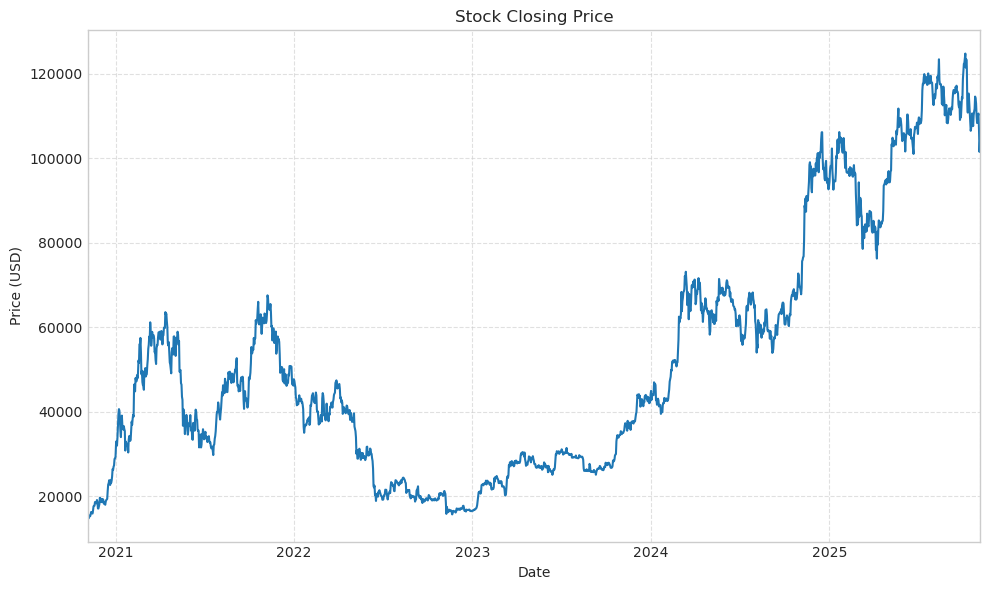

In [14]:
# Style sheet
plt.style.use('seaborn-v0_8-whitegrid')


btc_dt['Close'].plot(figsize=(10, 6), title='Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

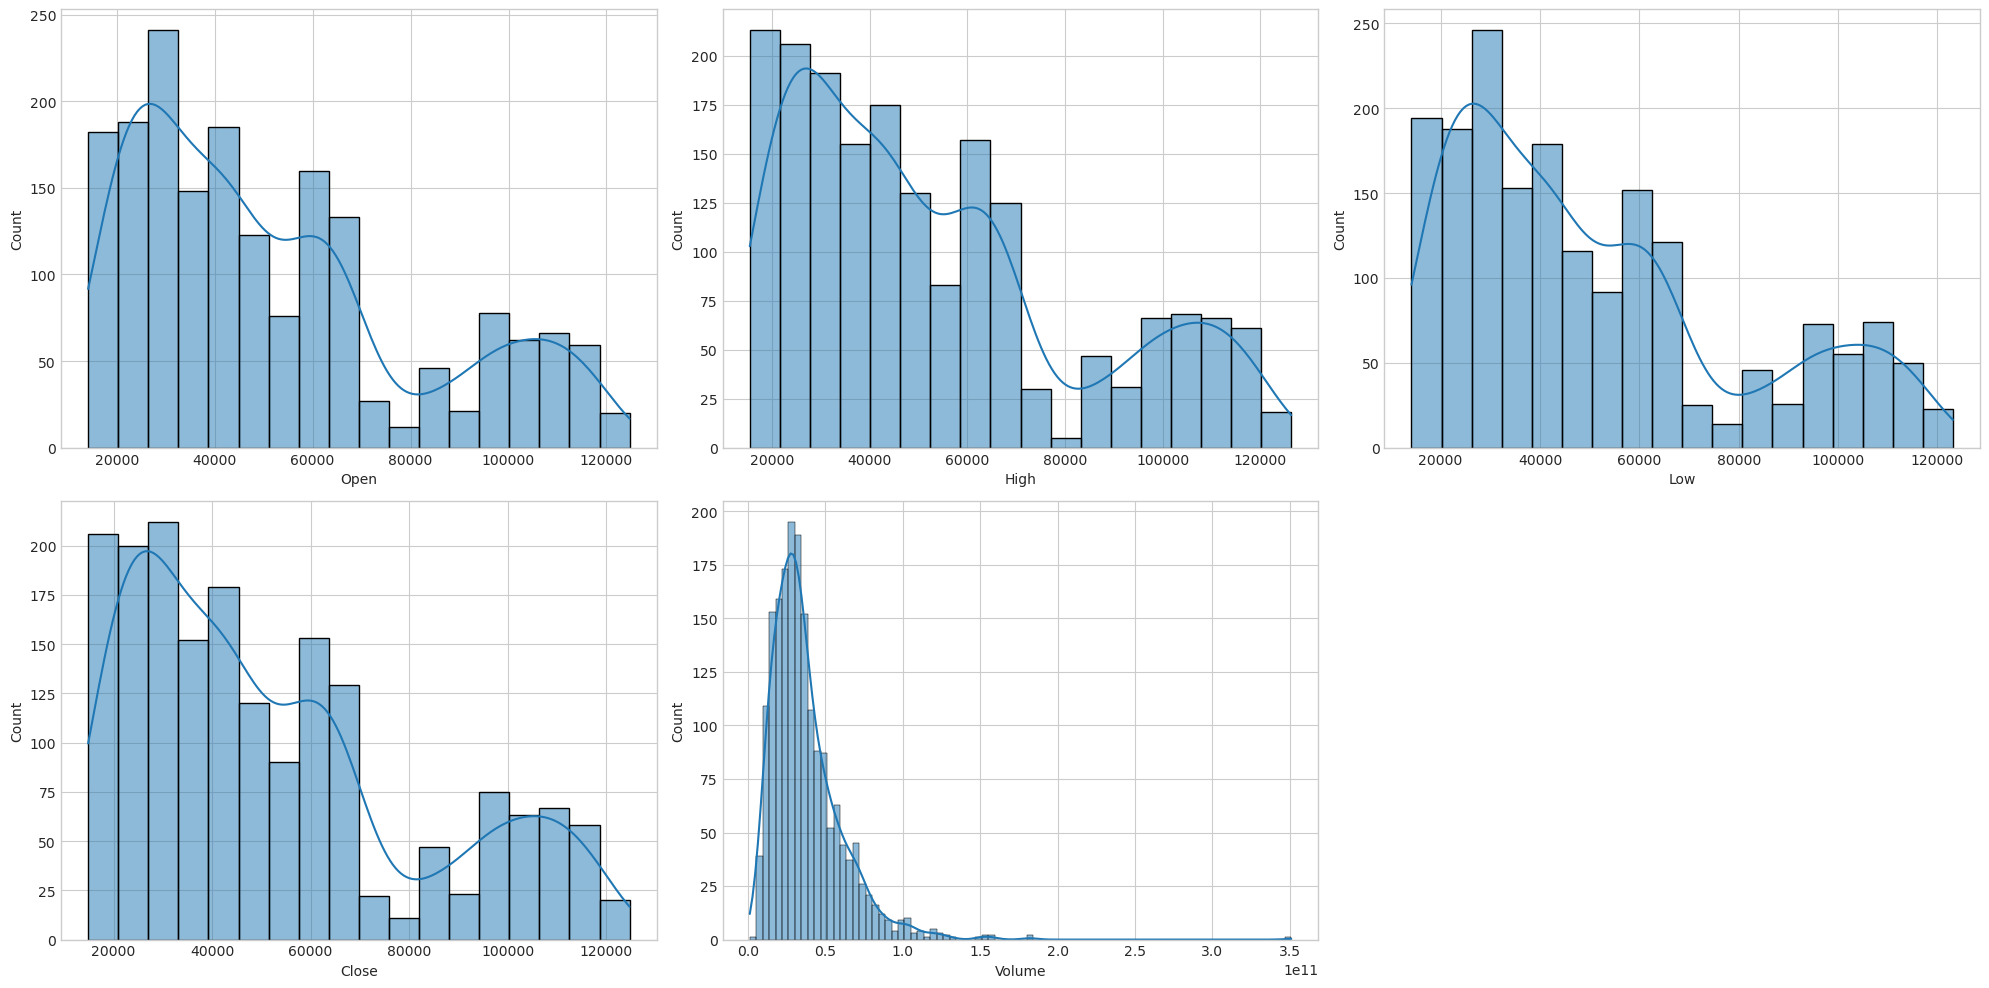

In [15]:
# Distribution Plots
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.histplot(btc_dt[col], kde=True)  # replaces distplot

plt.tight_layout()
plt.show()

# Feature Engineering

In [16]:
btc_dt['Year'] = btc_dt.index.year
btc_dt['Month'] = btc_dt.index.month
btc_dt['Day'] = btc_dt.index.day

btc_dt.head()

,Date,Close,Open,High,Low,Volume,Year,Month,Day
Date,,,,,,,,,
2020-11-05,2020-11-05,15608.21,14165.86,15775.00,14115.00,40856321439,2020,11,5
2020-11-06,2020-11-06,15599.95,15608.06,15977.67,15190.36,39837841971,2020,11,6
2020-11-07,2020-11-07,14834.09,15599.95,15779.24,14310.00,35024953706,2020,11,7
2020-11-08,2020-11-08,15482.90,14834.09,15666.00,14721.90,26632075029,2020,11,8
2020-11-09,2020-11-09,15342.25,15482.89,15856.90,14817.14,34149115566,2020,11,9


In [17]:
import numpy as np

btc_dt['is_quarter_end'] = np.where(btc_dt['Month']%3==0,1,0)
btc_dt.head()

,Date,Close,Open,High,Low,Volume,Year,Month,Day,is_quarter_end
Date,,,,,,,,,,
2020-11-05,2020-11-05,15608.21,14165.86,15775.00,14115.00,40856321439,2020,11,5,0
2020-11-06,2020-11-06,15599.95,15608.06,15977.67,15190.36,39837841971,2020,11,6,0
2020-11-07,2020-11-07,14834.09,15599.95,15779.24,14310.00,35024953706,2020,11,7,0
2020-11-08,2020-11-08,15482.90,14834.09,15666.00,14721.90,26632075029,2020,11,8,0
2020-11-09,2020-11-09,15342.25,15482.89,15856.90,14817.14,34149115566,2020,11,9,0


In [18]:
data_grouped = btc_dt.groupby('Year').mean()

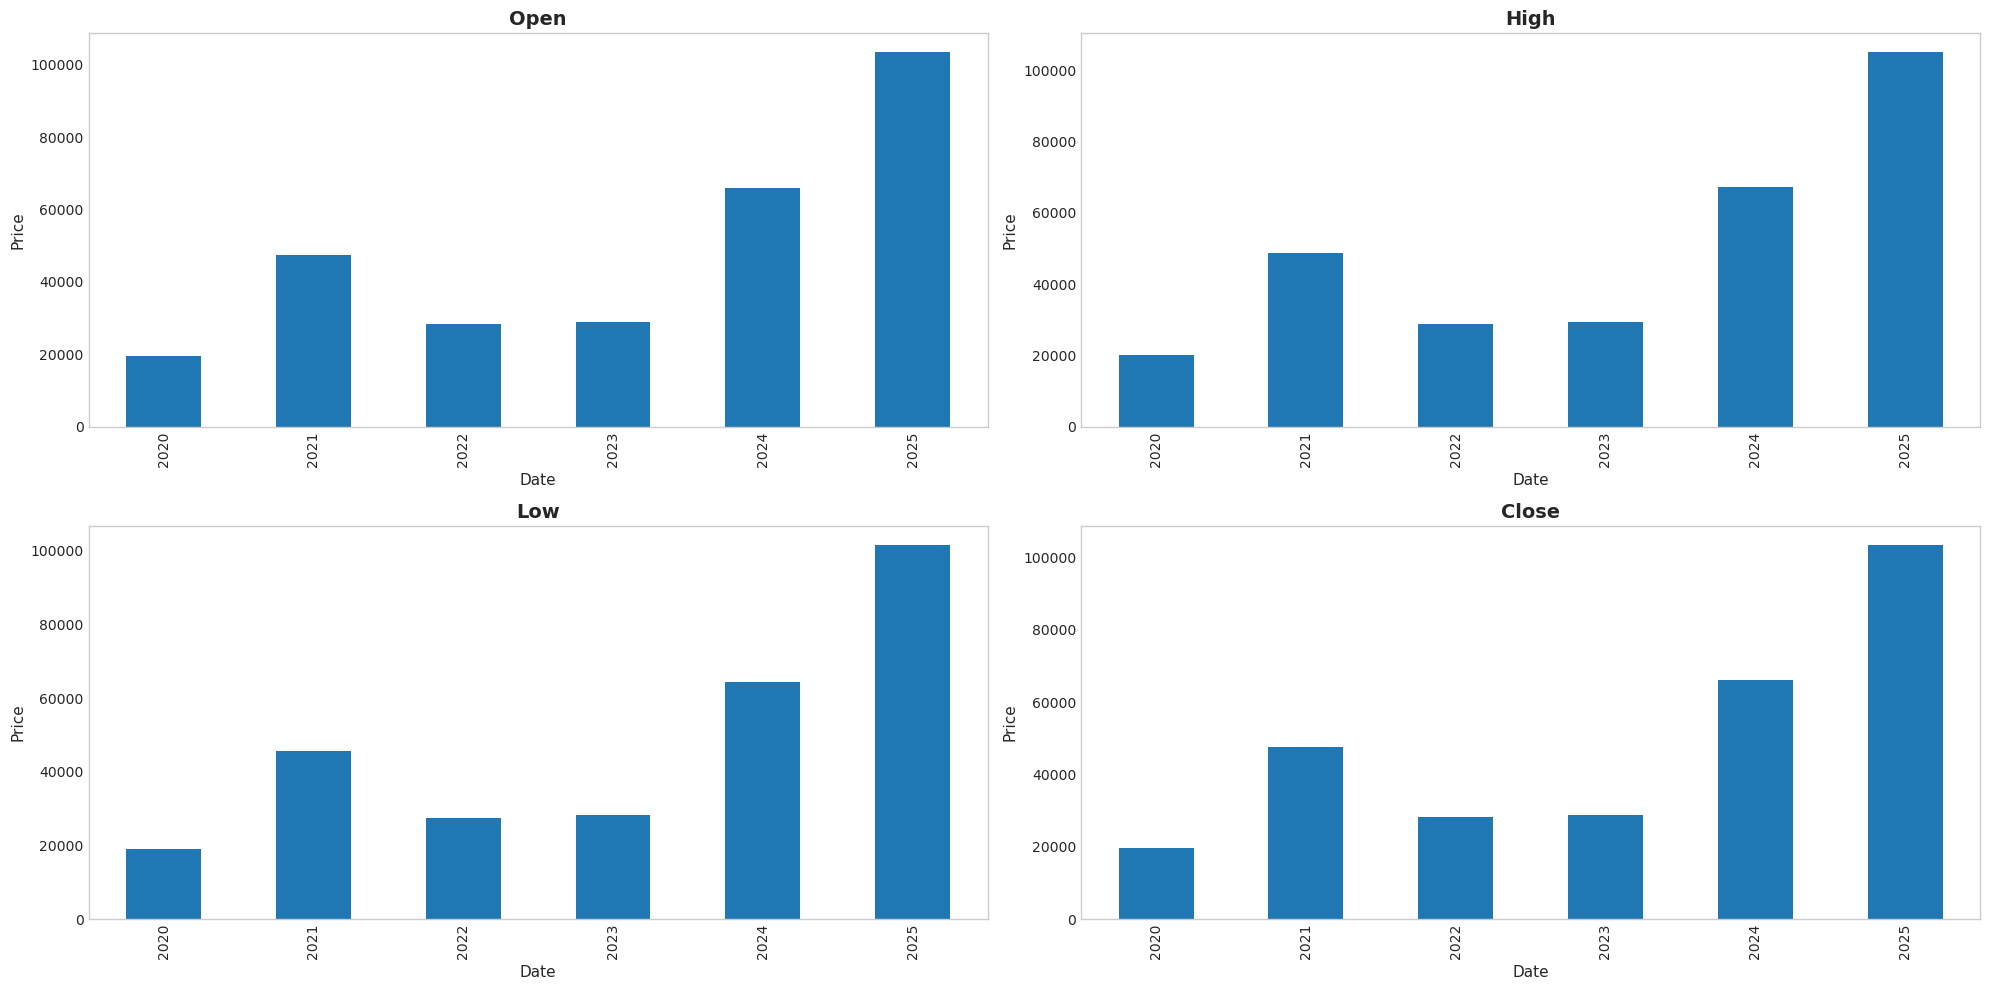

In [19]:
# Style sheet
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for ax, col in zip(axes.flatten(), ['Open', 'High', 'Low', 'Close']):
    data_grouped[col].plot.bar(ax=ax, grid=False)
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=11)
    ax.set_ylabel('Price', fontsize=11)

plt.tight_layout()
plt.show()

In [20]:
# Signal whether to buy or not
btc_dt['Open-Close']  = btc_dt['Open'] - btc_dt['Close']
btc_dt['Low-High']  = btc_dt['Low'] - btc_dt['High']

# Create target column with 1% price sensitivity
#btc_dt['Target'] = np.where(btc_dt['Close'].shift(-1) > btc_dt['Close'] * 1.01, 1, 0)

#print(f"Price Sensitivity: 1% (0.01)")
#print(f"Bullish signals (1): {btc_dt['Target'].sum()} ({btc_dt['Target'].sum()/len(btc_dt)*100:.2f}%)")
#print(f"Bearish signals (0): {(btc_dt['Target']==0).sum()} ({(btc_dt['Target']==0).sum()/len(btc_dt)*100:.2f}%)")

In [21]:
def create_labels(df, threshold=0.01, forward_days=7):
        """
        Create buy/no-buy labels based on future returns
        Buy (1) if price increases > threshold in next forward_days
        No-Buy (0) otherwise
        """
        df = df.copy()
        df['Future_Return'] = df['Close'].shift(-forward_days) / df['Close'] - 1
        df['Target'] = (df['Future_Return'] > threshold).astype(int)
        return df

Bullish signals (1): 726 (39.74%)
Bearish signals (0): 1101 (60.26%)


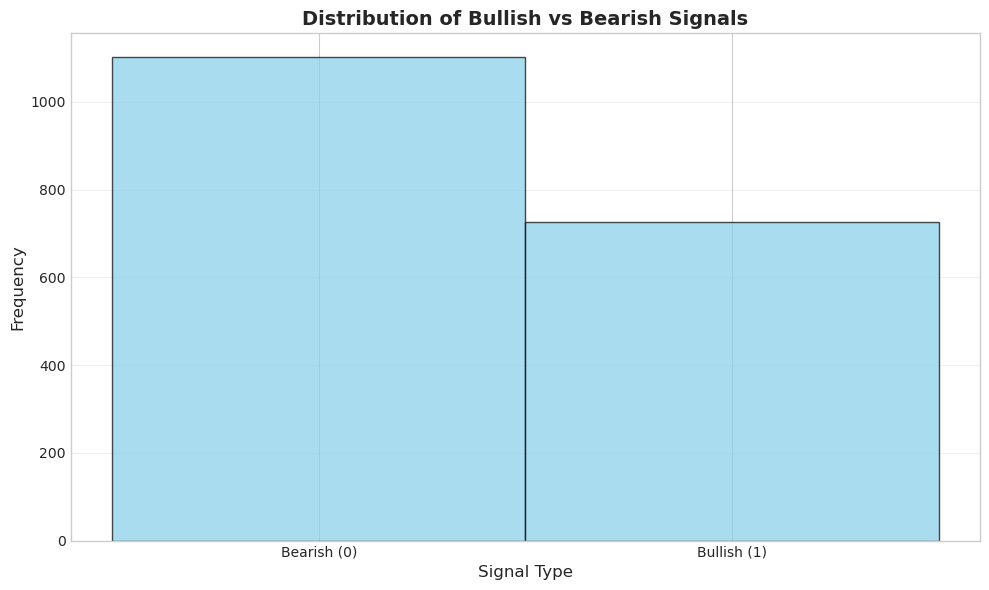

In [22]:
btc_dt = create_labels(btc_dt,0.02,7)

print(f"Bullish signals (1): {btc_dt['Target'].sum()} ({btc_dt['Target'].sum()/len(btc_dt)*100:.2f}%)")
print(f"Bearish signals (0): {(btc_dt['Target']==0).sum()} ({(btc_dt['Target']==0).sum()/len(btc_dt)*100:.2f}%)")

plt.figure(figsize=(10, 6))
plt.hist(btc_dt['Target'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Bearish (0)', 'Bullish (1)'])
plt.xlabel('Signal Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Bullish vs Bearish Signals', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:
btc_dt.head

<bound method NDFrame.head of                  Date      Close       Open       High        Low  \
Date                                                                
2020-11-05 2020-11-05   15608.21   14165.86   15775.00   14115.00   
2020-11-06 2020-11-06   15599.95   15608.06   15977.67   15190.36   
2020-11-07 2020-11-07   14834.09   15599.95   15779.24   14310.00   
2020-11-08 2020-11-08   15482.90   14834.09   15666.00   14721.90   
2020-11-09 2020-11-09   15342.25   15482.89   15856.90   14817.14   
...               ...        ...        ...        ...        ...   
2025-11-01 2025-11-01  110052.25  109555.63  110500.00  109342.47   
2025-11-02 2025-11-02  110536.01  110052.25  111221.99  108800.00   
2025-11-03 2025-11-03  106557.98  110533.83  110749.00  105271.67   
2025-11-04 2025-11-04  101468.15  106557.98  107269.85   98892.97   
2025-11-05 2025-11-05  103960.89  101468.16  104550.00   98950.00   

                  Volume  Year  Month  Day  is_quarter_end  Open-Close  

In [24]:
# Technical Analysis Features

# Moving Averages
btc_dt['MA_7'] = btc_dt['Close'].rolling(window=7).mean()
btc_dt['MA_14'] = btc_dt['Close'].rolling(window=14).mean()
btc_dt['MA_21'] = btc_dt['Close'].rolling(window=21).mean()
btc_dt['MA_50'] = btc_dt['Close'].rolling(window=50).mean()
btc_dt['MA_200'] = btc_dt['Close'].rolling(window=200).mean()

# Exponential Moving Averages
btc_dt['EMA_12'] = btc_dt['Close'].ewm(span=12, adjust=False).mean()
btc_dt['EMA_26'] = btc_dt['Close'].ewm(span=26, adjust=False).mean()

# MACD (Moving Average Convergence Divergence)
btc_dt['MACD'] = btc_dt['EMA_12'] - btc_dt['EMA_26']
btc_dt['MACD_Signal'] = btc_dt['MACD'].ewm(span=9, adjust=False).mean()
btc_dt['MACD_Histogram'] = btc_dt['MACD'] - btc_dt['MACD_Signal']

# Relative Strength Index (RSI)
delta = btc_dt['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
btc_dt['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
btc_dt['BB_Middle'] = btc_dt['Close'].rolling(window=20).mean()
bb_std = btc_dt['Close'].rolling(window=20).std()
btc_dt['BB_Upper'] = btc_dt['BB_Middle'] + (bb_std * 2)
btc_dt['BB_Lower'] = btc_dt['BB_Middle'] - (bb_std * 2)
btc_dt['BB_Width'] = btc_dt['BB_Upper'] - btc_dt['BB_Lower']

# Price Rate of Change (ROC)
btc_dt['ROC'] = ((btc_dt['Close'] - btc_dt['Close'].shift(10)) / btc_dt['Close'].shift(10)) * 100

# Average True Range (ATR) - Volatility Indicator
high_low = btc_dt['High'] - btc_dt['Low']
high_close = np.abs(btc_dt['High'] - btc_dt['Close'].shift())
low_close = np.abs(btc_dt['Low'] - btc_dt['Close'].shift())
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
btc_dt['ATR'] = true_range.rolling(window=14).mean()

# Stochastic Oscillator
low_14 = btc_dt['Low'].rolling(window=14).min()
high_14 = btc_dt['High'].rolling(window=14).max()
btc_dt['Stochastic_%K'] = 100 * ((btc_dt['Close'] - low_14) / (high_14 - low_14))
btc_dt['Stochastic_%D'] = btc_dt['Stochastic_%K'].rolling(window=3).mean()

# On-Balance Volume (OBV)
btc_dt['OBV'] = (np.sign(btc_dt['Close'].diff()) * btc_dt['Volume']).fillna(0).cumsum()

# Volume Rate of Change
btc_dt['Volume_ROC'] = ((btc_dt['Volume'] - btc_dt['Volume'].shift(5)) / btc_dt['Volume'].shift(5)) * 100

# Price momentum
btc_dt['Momentum'] = btc_dt['Close'] - btc_dt['Close'].shift(4)

# Percentage change features
btc_dt['Daily_Return'] = btc_dt['Close'].pct_change() * 100
btc_dt['Volatility_10'] = btc_dt['Daily_Return'].rolling(window=10).std()
btc_dt['Volatility_30'] = btc_dt['Daily_Return'].rolling(window=30).std()

#_logs.info(f"Technical analysis features created. Dataset now has {btc_dt.shape[1]} features.")

In [25]:
btc_dt.head()

,Date,Close,Open,High,Low,Volume,Year,Month,Day,is_quarter_end,...,ROC,ATR,Stochastic_%K,Stochastic_%D,OBV,Volume_ROC,Momentum,Daily_Return,Volatility_10,Volatility_30
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-05,2020-11-05,15608.21,14165.86,15775.00,14115.00,40856321439,2020,11,5,0,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
2020-11-06,2020-11-06,15599.95,15608.06,15977.67,15190.36,39837841971,2020,11,6,0,...,NaN,NaN,NaN,NaN,-3.983784e+10,NaN,NaN,-0.052921,NaN,NaN
2020-11-07,2020-11-07,14834.09,15599.95,15779.24,14310.00,35024953706,2020,11,7,0,...,NaN,NaN,NaN,NaN,-7.486280e+10,NaN,NaN,-4.909375,NaN,NaN
2020-11-08,2020-11-08,15482.90,14834.09,15666.00,14721.90,26632075029,2020,11,8,0,...,NaN,NaN,NaN,NaN,-4.823072e+10,NaN,NaN,4.373777,NaN,NaN
2020-11-09,2020-11-09,15342.25,15482.89,15856.90,14817.14,34149115566,2020,11,9,0,...,NaN,NaN,NaN,NaN,-8.237984e+10,NaN,-265.96,-0.908422,NaN,NaN


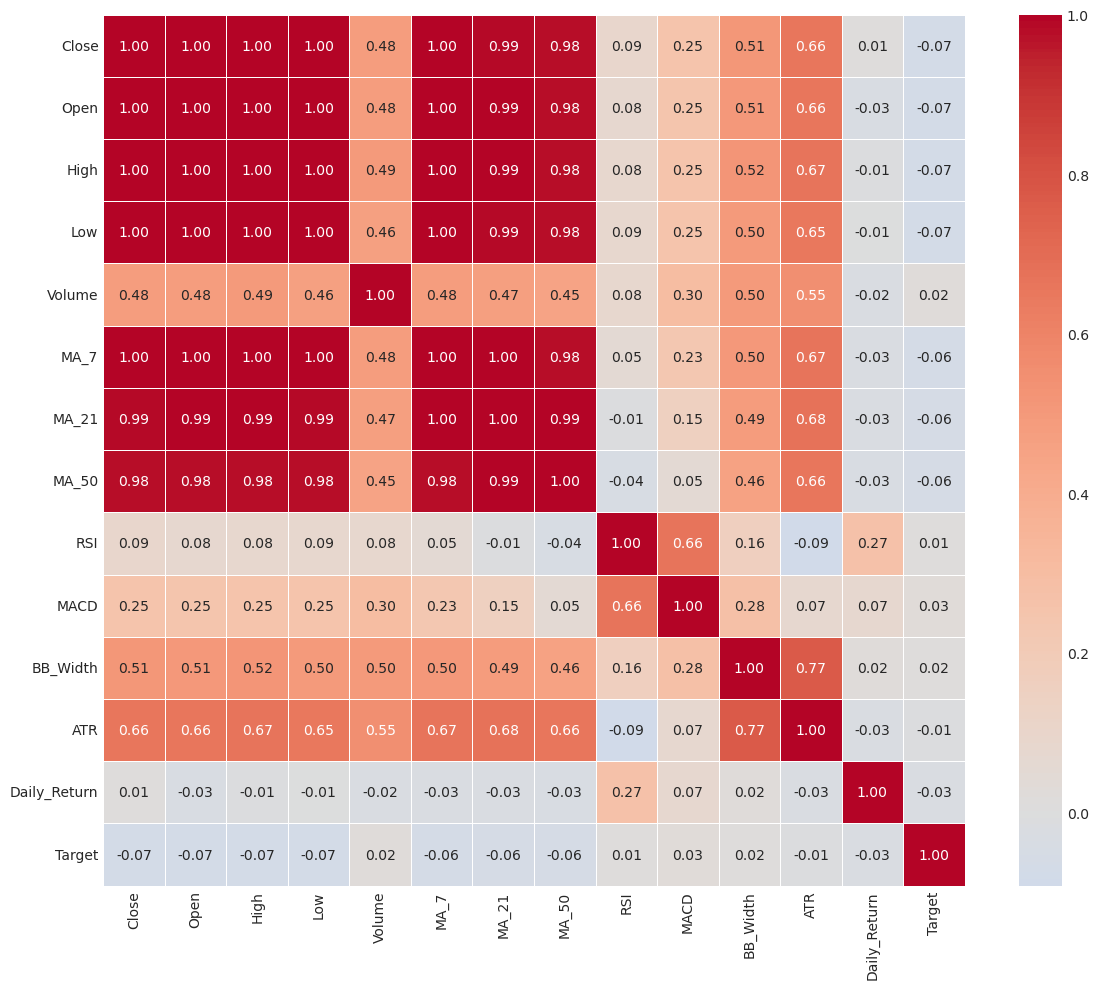

In [26]:
# Correlation Heatmap - simplified version
# Selecting most important features to reduce visual clutter
important_features = ['Close', 'Open', 'High', 'Low', 'Volume',
                      'MA_7', 'MA_21', 'MA_50', 'RSI', 'MACD',
                      'BB_Width', 'ATR', 'Daily_Return', 'Target']

plt.figure(figsize=(12, 10))
sb.heatmap(btc_dt[important_features].corr(), annot=True, cbar=True, fmt='.2f',
           cmap='coolwarm', center=0, linewidths=0.5)
#plt.title("Feature Correlation Heatmap (Key Features)")
plt.tight_layout()
plt.show()


# Model Development


In [27]:
#Mock the sentiment for now!
def generate_sentiment(ret):
    if ret > 0.03:
        return "Bitcoin surges with strong buying momentum"
    elif ret > 0.01:
        return "Bitcoin shows positive price action"
    elif ret > -0.01:
        return "Bitcoin trading sideways in consolidation"
    elif ret > -0.03:
        return "Bitcoin faces selling pressure"
    else:
        return "Bitcoin declines on negative sentiment"

In [28]:
from sklearn.preprocessing import StandardScaler,RobustScaler
#btc_dt[btc_dt.isna().any(axis=1)]
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def prepare_data(df,tokenizer,tech_columns, window_size = 7, max_length=64):

    #TODO: Join from the sentiment data based on date so is not generated
    df["Sentiment_Text"] = (df['Close'].pct_change()).apply(generate_sentiment)

    input_ids_list = []
    attention_mask_list = []
    technical_data_list = []
    labels_list = []

    for idx in range(len(df) - window_size):
        # Get window of technical indicators
        start_idx = idx
        end_idx = idx + window_size

        tech_data = df.iloc[start_idx:end_idx][tech_columns].values
        tech_data = tech_data.T  # Shape: (features, window_size)

        # Get news text for the last day in window
        news_text = df.iloc[end_idx - 1]['Sentiment_Text']
        encoding = tokenizer(
            news_text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='np'
        )

        # Get label
        label = df.iloc[end_idx - 1]['Target']

        input_ids_list.append(encoding['input_ids'][0])
        attention_mask_list.append(encoding['attention_mask'][0])
        technical_data_list.append(tech_data)
        labels_list.append(label)

    return {
        'input_ids': np.array(input_ids_list),
        'attention_mask': np.array(attention_mask_list),
        'technical_data': np.array(technical_data_list),
        'labels': np.array(labels_list)
    }

2025/11/10 23:13:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [29]:
# TensorFlow/Keras imports
import tensorflow as tf
from tf_keras import layers, Model
from transformers import TFBertModel, AutoTokenizer
from tf_keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

def build_finbert_bitcoin_classifier(num_features=32,
                                     window_size=14,
                                     max_length=64,
                                     dropout=0.3):
    print("Building model...\n")

    # FinBERT branch
    input_ids = layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

    finbert = TFBertModel.from_pretrained('ProsusAI/finbert')
    finbert.trainable = False  # FREEZE FinBERT

    bert_output = finbert(input_ids, attention_mask=attention_mask)
    sentiment_features = layers.Dense(32, activation='relu')(bert_output.pooler_output)

    # CNN branch for technical indicators
    tech_input = layers.Input(shape=(num_features, window_size), name='technical_data')

    conv1 = layers.Conv1D(32, 3, activation='relu', padding='same')(tech_input)
    pool1 = layers.MaxPooling1D(2)(conv1)
    flatten = layers.Flatten()(pool1)
    tech_features = layers.Dense(32, activation='relu')(flatten)

    # Combine and classify
    combined = layers.Concatenate()([sentiment_features, tech_features])
    dense1 = layers.Dense(32, activation='relu')(combined)
    dropout = layers.Dropout(0.3)(dense1)
    output = layers.Dense(2, activation='softmax')(dropout)

    model = Model(
        inputs=[input_ids, attention_mask, tech_input],
        outputs=output
    )

    print(f"Model created - {model.count_params():,} parameters")
    return model

2025/11/10 23:13:42 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.9.2, but the installed version is 3.10.0. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/11/10 23:13:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/11/10 23:13:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/11/10 23:13:47 WARNING mlflow.utils.autologging_utils: MLflow transformers autologging is known to be compatible with 4.35.2 <= transformers <= 4.51.2, but the installed version is 4.53.2. If you encounter errors during autologging, try upgrading / downgrading transformers to a compatible version, or try upgrading MLflow.
2025/11/10 23:13:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.


In [30]:
def train_model(model, train_data, val_data, epochs=10):
    print("Training model...\n")

    model.compile(
        optimizer=Adam(3e-5),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        {
            'input_ids': train_data['input_ids'],
            'attention_mask': train_data['attention_mask'],
            'technical_data': train_data['technical_data']
        },
        train_data['labels'],
        validation_data=(
            {
                'input_ids': val_data['input_ids'],
                'attention_mask': val_data['attention_mask'],
                'technical_data': val_data['technical_data']
            },
            val_data['labels']
        ),
        epochs=epochs,
        batch_size=32,
        verbose=1
    )

    return history

In [31]:
# Report the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [32]:
def evaluate_model(model, test_data):
    print("Evaluating model...\n")

    predictions = model.predict({
        'input_ids': test_data['input_ids'],
        'attention_mask': test_data['attention_mask'],
        'technical_data': test_data['technical_data']
    }, verbose=0)

    pred_classes = np.argmax(predictions, axis=1)
    pred_probs = predictions[:,1]
    true_labels = test_data['labels']

    print("\n" + "="*60)
    print("RESULTS")
    print("="*60)
    print(classification_report(true_labels, pred_classes,
                                target_names=['No-Buy', 'Buy']))

    plot_confusion_matrix(true_labels,pred_classes,['No-Buy','Buy'])

    # Calculate ROC-AUC
    try:
        roc_auc = roc_auc_score(true_labels, pred_probs)
        print(f"ROC-AUC Score: {roc_auc:.4f}\n")
    except:
        roc_auc = None
        print("ROC-AUC Score: N/A\n")

    fpr, tpr, _ = roc_curve(true_labels, pred_probs)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate', fontsize=11)
    plt.ylabel('True Positive Rate', fontsize=11)
    plt.title('ROC Curve', fontsize=12, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3) 
    
    accuracy = (pred_classes == true_labels).mean() * 100
    print(f" Test Accuracy: {accuracy:.2f}%\n")
    print("="*60)

    return accuracy

# Main Execution

In [ ]:
# Prepare data - drop rows with NaN values and select features
# We drop instead of replace to maintain data integrity
ml_data = btc_dt.dropna().copy()
# Select features for modeling (excluding target and date-related features)
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume',
                'Open-Close', 'Low-High',
                'MA_7', 'MA_14', 'MA_21', 'MA_50', 'MA_200',
                'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Histogram',
                'RSI', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'BB_Width',
                'ROC', 'ATR', 'Stochastic_%K', 'Stochastic_%D',
                'OBV', 'Volume_ROC', 'Momentum', 'Daily_Return',
                'Volatility_10', 'Volatility_30']
WINDOW_SIZE= 7
MAX_LENGTH = 64
EPOCHS=10

with mlflow.start_run():
 # Load tokenizer
 print("Loading FinBERT tokenizer...\n")
 tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
 
 # Split data (80% train, 20% test)
 split_idx = int(0.8 * len(ml_data))
 train_df = ml_data.iloc[:split_idx]
 test_df = ml_data.iloc[split_idx:]
 
 # Normalize technical indicators
 scaler = RobustScaler()
 train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
 test_df[feature_cols] = scaler.transform(test_df[feature_cols])
 
 # Prepare data
 train_data = prepare_data(train_df, tokenizer, feature_cols, WINDOW_SIZE, MAX_LENGTH)
 test_data = prepare_data(test_df, tokenizer,feature_cols, WINDOW_SIZE, MAX_LENGTH)
 
 print(f"\nTrain samples: {len(train_data['labels'])}")
 print(f"Test samples:  {len(test_data['labels'])}")
 
 # Build model
 model = build_finbert_bitcoin_classifier(num_features=32, window_size=WINDOW_SIZE)
 model.summary()
 # Train
 history = train_model(model, train_data, test_data, epochs=EPOCHS)

Loading FinBERT tokenizer...



/tmp/ipykernel_1604/3405039888.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
/tmp/ipykernel_1604/3405039888.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[feature_cols] = scaler.transform(test_df[feature_cols])
/tmp/ipykernel_1604/4109642220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d


Train samples: 1289
Test samples:  318
Building model...



All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at ProsusAI/finbert.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


✓ Model created - 109,526,114 parameters
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 technical_data (InputLayer  [(None, 32, 7)]              0         []                            
 )                                                                                                
                                                                                                  
 conv1d (Conv1D)             (None, 32, 32)               704       ['technical_data[0][0]']      
                                                                                                  
 input_ids (InputLayer)      [(None, 64)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 64)]            

Evaluating model...


RESULTS
              precision    recall  f1-score   support

      No-Buy       0.65      0.96      0.78       210
         Buy       0.18      0.02      0.03       108

    accuracy                           0.64       318
   macro avg       0.42      0.49      0.41       318
weighted avg       0.49      0.64      0.52       318



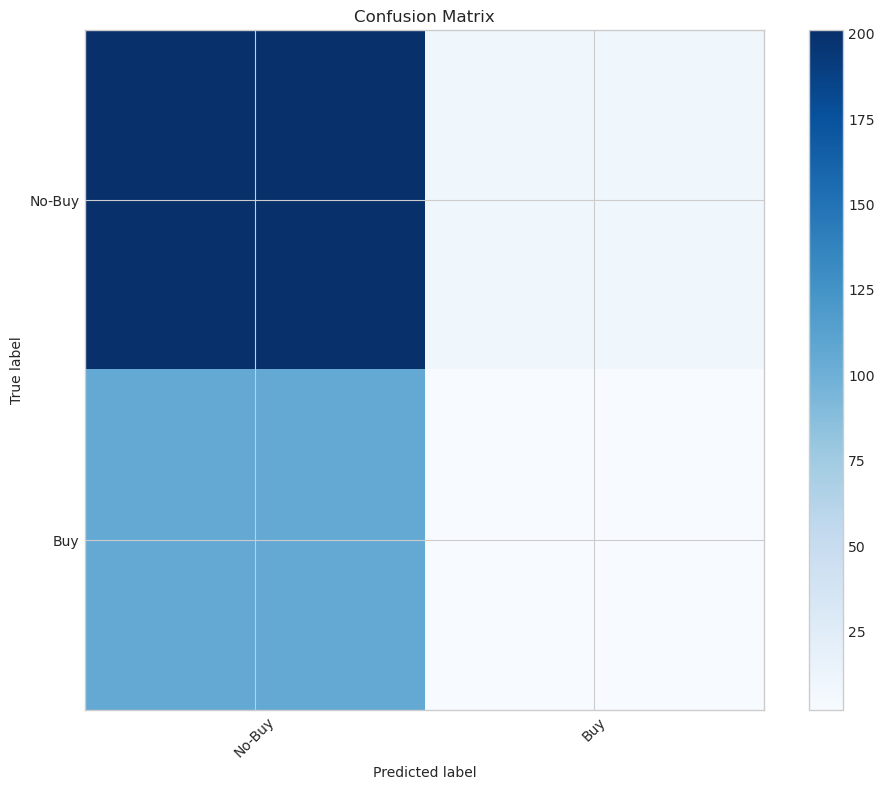

ROC-AUC Score: 0.4903

 Test Accuracy: 63.84%



/home/jbueno/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 Model saved as: bitcoin_baseline_model.h5



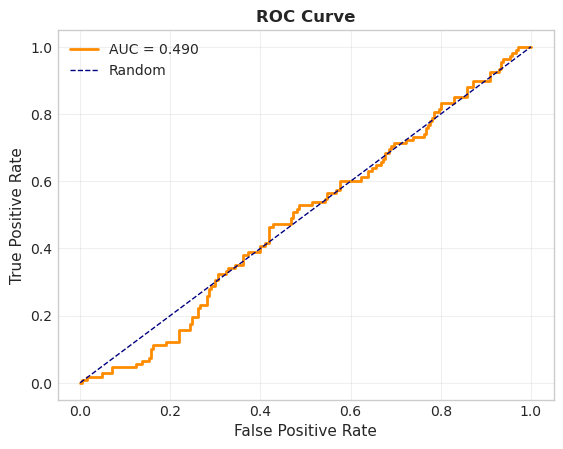

In [ ]:
# Evaluate
accuracy = evaluate_model(model, test_data)

# Save model
model.save('bitcoin_baseline_model.h5')
print(" Model saved as: bitcoin_baseline_model.h5\n")

# Run with setiment dataset

In [31]:
def clean_sentiment(sentiment_dt):

 sentiment_dt['Week_Start'] = pd.to_datetime(sentiment_dt['Week_Start'])
 sentiment_dt['Week_End'] =  pd.to_datetime(sentiment_dt['Week_End'])
 sentiment_dt['Week_Start'] = pd.to_datetime(sentiment_dt['Week_Start'])
 sentiment_dt['Week_End'] =  pd.to_datetime(sentiment_dt['Week_End'])
 
 # Clean the Summary
 sentiment_dt['Sentiment_Text'] = sentiment_dt['Summary'].str.replace(r'[\n\r\t]',' ',regex=True)
 sentiment_dt['Sentiment_Text'] = sentiment_dt['Sentiment_Text'].str.replace(r'[^a-zA-Z0-9\s.,!?\-\']','',regex=True)
 
 return sentiment_dt

In [32]:
file = os.getenv("SENTIMENT_DATA")

# Read the raw CSV:
# - header=0 reads the first line (original names) but they are replaced by 'columns'
# - names=columns ensures consistent snake_case naming initialize above
cols = ['Week','Week_Code','Week_Start','Week_End','Sentiment','Price_Start','Price_End','Price_Avg','Price_Change','Agreement','Summary']
sent_dt = (pd.read_csv(file, header = 0, names =cols ))
sent_dt = clean_sentiment(sent_dt)

# Save processed data to a new CSV folder and appeand file name with hash value
# Create a hash of the DataFrame
df_hash = hashlib.md5(sent_dt.to_csv(index=False).encode()).hexdigest()
processed_sentiment_file = os.getenv("PROCESSED_SENTIMENT_DATA").replace(".csv", f"_{df_hash}.csv")
sent_dt.to_csv(processed_sentiment_file, index=False)

In [33]:
print(sent_dt['Week_Start'].min())
print(sent_dt['Week_End'].max())

2020-11-05 00:00:00
2025-11-02 00:00:00


In [34]:
result =  btc_dt.merge(sent_dt, how='cross')
result = result[(result['Date'] >= result['Week_Start']) & (result['Date']<= result['Week_End'])]
result

,Date,Close,Open,High,Low,Volume,Year,Month,Day,is_quarter_end,...,Week_Start,Week_End,Sentiment,Price_Start,Price_End,Price_Avg,Price_Change,Agreement,Summary,Sentiment_Text
0,2020-11-05,15608.21,14165.86,15775.00,14115.00,40856321439,2020,11,5,0,...,2020-11-05,2020-11-08,Bullish,15608.21,15482.90,15381.29,-0.80,Disagree,Bitcoin Market Health\nBitcoin had yet another...,Bitcoin Market Health Bitcoin had yet another ...
260,2020-11-06,15599.95,15608.06,15977.67,15190.36,39837841971,2020,11,6,0,...,2020-11-05,2020-11-08,Bullish,15608.21,15482.90,15381.29,-0.80,Disagree,Bitcoin Market Health\nBitcoin had yet another...,Bitcoin Market Health Bitcoin had yet another ...
520,2020-11-07,14834.09,15599.95,15779.24,14310.00,35024953706,2020,11,7,0,...,2020-11-05,2020-11-08,Bullish,15608.21,15482.90,15381.29,-0.80,Disagree,Bitcoin Market Health\nBitcoin had yet another...,Bitcoin Market Health Bitcoin had yet another ...
780,2020-11-08,15482.90,14834.09,15666.00,14721.90,26632075029,2020,11,8,0,...,2020-11-05,2020-11-08,Bullish,15608.21,15482.90,15381.29,-0.80,Disagree,Bitcoin Market Health\nBitcoin had yet another...,Bitcoin Market Health Bitcoin had yet another ...
1041,2020-11-09,15342.25,15482.89,15856.90,14817.14,34149115566,2020,11,9,0,...,2020-11-09,2020-11-15,Bearish,15342.25,15966.89,15866.05,4.07,Disagree,Bitcoin Market Health\nBitcoin experienced ano...,Bitcoin Market Health Bitcoin experienced anot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473199,2025-10-29,110032.13,112906.75,113690.17,109000.00,69673964814,2025,10,29,0,...,2025-10-27,2025-11-02,Bullish,114087.06,110536.01,110782.52,-3.11,Disagree,Executive Summary\nBitcoin fell below the Shor...,Executive Summary Bitcoin fell below the Short...
473459,2025-10-30,108308.18,110031.65,111629.20,106279.33,69673964814,2025,10,30,0,...,2025-10-27,2025-11-02,Bullish,114087.06,110536.01,110782.52,-3.11,Disagree,Executive Summary\nBitcoin fell below the Shor...,Executive Summary Bitcoin fell below the Short...
473719,2025-10-31,109555.27,108308.02,111066.10,108266.11,60090359560,2025,10,31,0,...,2025-10-27,2025-11-02,Bullish,114087.06,110536.01,110782.52,-3.11,Disagree,Executive Summary\nBitcoin fell below the Shor...,Executive Summary Bitcoin fell below the Short...
473979,2025-11-01,110052.25,109555.63,110500.00,109342.47,34284209459,2025,11,1,0,...,2025-10-27,2025-11-02,Bullish,114087.06,110536.01,110782.52,-3.11,Disagree,Executive Summary\nBitcoin fell below the Shor...,Executive Summary Bitcoin fell below the Short...


In [35]:
from sklearn.preprocessing import StandardScaler,RobustScaler
#btc_dt[btc_dt.isna().any(axis=1)]
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def prepare_data_sentiment(df,sentiment_df,tokenizer,tech_columns, window_size = 7, max_length=64):

    #TODO: Join from the sentiment data based on date so is not generated
    #df["Sentiment_Text"] = (df['Close'].pct_change()).apply(generate_sentiment)

    df =  df.merge(sentiment_df, how='cross')
    df = df[(df['Date'] >= df['Week_Start']) & (df['Date']<= df['Week_End'])]

    input_ids_list = []
    attention_mask_list = []
    technical_data_list = []
    labels_list = []

    for idx in range(len(df) - window_size):
        # Get window of technical indicators
        start_idx = idx
        end_idx = idx + window_size

        tech_data = df.iloc[start_idx:end_idx][tech_columns].values
        tech_data = tech_data.T  # Shape: (features, window_size)

        # Get news text for the last day in window
        news_text = df.iloc[end_idx - 1]['Sentiment_Text']
        encoding = tokenizer(
            news_text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='np'
        )

        # Get label
        label = df.iloc[end_idx - 1]['Target']

        input_ids_list.append(encoding['input_ids'][0])
        attention_mask_list.append(encoding['attention_mask'][0])
        technical_data_list.append(tech_data)
        labels_list.append(label)

    return {
        'input_ids': np.array(input_ids_list),
        'attention_mask': np.array(attention_mask_list),
        'technical_data': np.array(technical_data_list),
        'labels': np.array(labels_list)
    }

In [43]:
# Prepare data - drop rows with NaN values and select features
# We drop instead of replace to maintain data integrity
ml_data = btc_dt.dropna().copy()
# Select features for modeling (excluding target and date-related features)
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume',
                'Open-Close', 'Low-High',
                'MA_7', 'MA_14', 'MA_21', 'MA_50', 'MA_200',
                'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Histogram',
                'RSI', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'BB_Width',
                'ROC', 'ATR', 'Stochastic_%K', 'Stochastic_%D',
                'OBV', 'Volume_ROC', 'Momentum', 'Daily_Return',
                'Volatility_10', 'Volatility_30']
WINDOW_SIZE= 7
MAX_LENGTH = 128
EPOCHS=10

with mlflow.start_run():
 # Load tokenizer
 print("Loading FinBERT tokenizer...\n")
 tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
 
 # Split data (80% train, 20% test)
 split_idx = int(0.8 * len(ml_data))
 train_df = ml_data.iloc[:split_idx]
 test_df = ml_data.iloc[split_idx:]
 
 # Normalize technical indicators
 scaler = RobustScaler()
 train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
 test_df[feature_cols] = scaler.transform(test_df[feature_cols])
 
 # Prepare data
 train_data = prepare_data_sentiment(train_df,sent_dt, tokenizer, feature_cols, WINDOW_SIZE, MAX_LENGTH)
 
 test_data = prepare_data_sentiment(test_df,sent_dt,tokenizer,feature_cols, WINDOW_SIZE, MAX_LENGTH)
 
 print(f"\nTrain samples: {len(train_data['labels'])}")
 print(f"Test samples:  {len(test_data['labels'])}")
 
 # Build model
 model = build_finbert_bitcoin_classifier(num_features=32, window_size=WINDOW_SIZE, max_length=MAX_LENGTH)
 model.summary()
 # Train
 history = train_model(model, train_data, test_data, epochs=EPOCHS)

Loading FinBERT tokenizer...



/tmp/ipykernel_15781/3227377922.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
/tmp/ipykernel_15781/3227377922.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[feature_cols] = scaler.transform(test_df[feature_cols])



Train samples: 1289
Test samples:  318
Building model...



All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at ProsusAI/finbert.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


✓ Model created - 109,526,114 parameters
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 technical_data (InputLayer  [(None, 32, 7)]              0         []                            
 )                                                                                                
                                                                                                  
 conv1d_3 (Conv1D)           (None, 32, 32)               704       ['technical_data[0][0]']      
                                                                                                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]         

Evaluating model...


RESULTS
              precision    recall  f1-score   support

      No-Buy       0.66      0.97      0.79       210
         Buy       0.40      0.04      0.07       108

    accuracy                           0.65       318
   macro avg       0.53      0.50      0.43       318
weighted avg       0.57      0.65      0.54       318



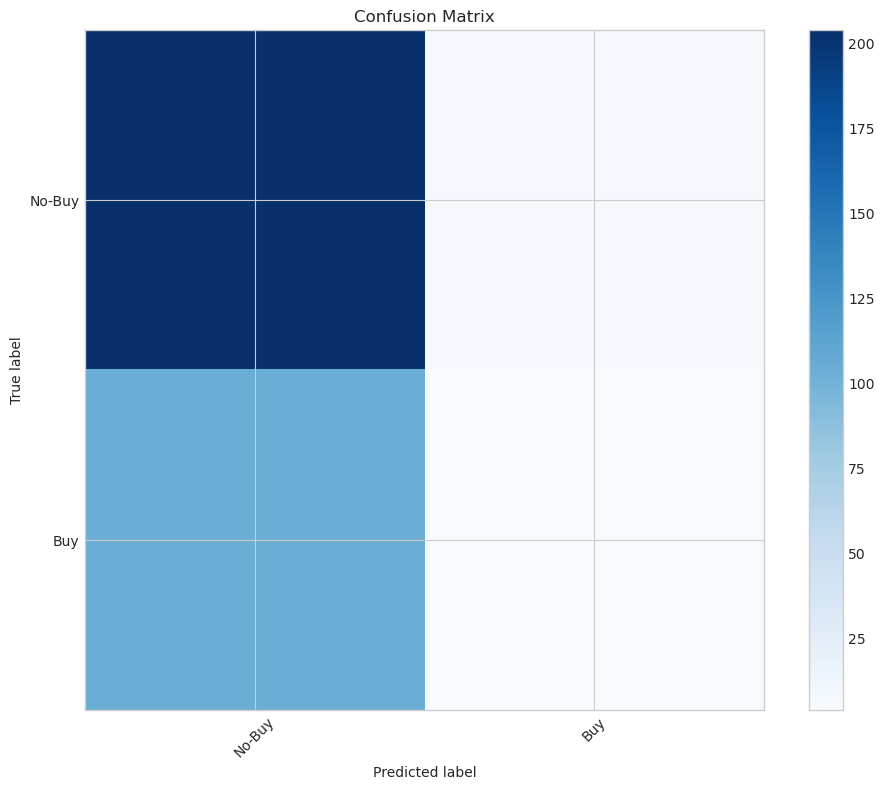

ROC-AUC Score: 0.6006

 Test Accuracy: 65.41%



/home/jbueno/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 Model saved as: bitcoin_sent_baseline_model.h5



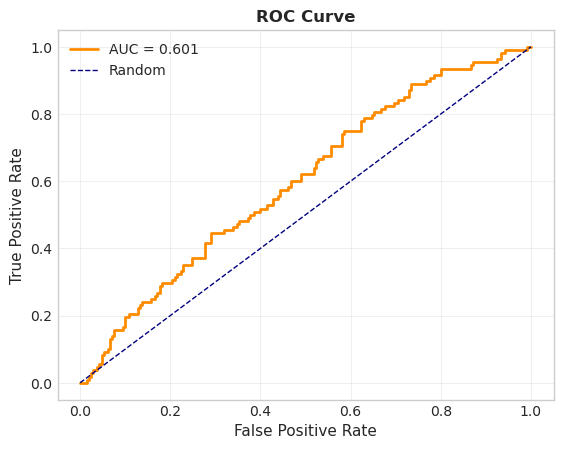

In [44]:
# Evaluate
accuracy = evaluate_model(model, test_data)

# Save model
model.save('bitcoin_sent_baseline_model.h5')
print(" Model saved as: bitcoin_sent_baseline_model.h5\n")

# Dual Finbert(Twitter, Glassnode) + CNN

In [44]:
def clean_twitter_txt(df):

 #Clean twitter data
 df['date'] = pd.to_datetime(df['date'], errors='coerce')
 df = df.dropna(subset=['text'])
 df['date_only'] = pd.to_datetime(df['date']).dt.date
 df['text'] = df['text'].str.replace(r'[\n\r\t]',' ',regex=True)
 df['Twitter_Text'] = df['text'].str.replace(r'[^a-zA-Z0-9\s.,!?\-\']','',regex=True)
 df = df[df['user_verified'] == 'True']\
    .sort_values(by=['date_only','user_followers','user_favourites'],ascending=False)\
    .groupby('date_only')['Twitter_Text']\
    .apply(
        lambda t: ' '.join(t)
    ).reset_index()

 return df

In [45]:
file = os.getenv("TWITTER_DATA")

# Read the raw CSV:
# - header=0 reads the first line (original names) but they are replaced by 'columns'
# - names=columns ensures consistent snake_case naming initialize above
t_dt = pd.read_csv(file)
t_dt = clean_twitter_txt(t_dt)

# Save processed data to a new CSV folder and appeand file name with hash value
# Create a hash of the DataFrame
df_hash = hashlib.md5(t_dt.to_csv(index=False).encode()).hexdigest()
processed_sentiment_file = os.getenv("PROCESSED_TWITTER_DATA").replace(".csv", f"_{df_hash}.csv")
t_dt.to_csv(processed_sentiment_file, index=False)

/tmp/ipykernel_4002/3319928636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_only'] = pd.to_datetime(df['date']).dt.date
/tmp/ipykernel_4002/3319928636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.replace(r'[\n\r\t]',' ',regex=True)
/tmp/ipykernel_4002/3319928636.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [46]:
t_dt

,date_only,Twitter_Text
0,2021-02-10,blockstreamaqua is our new bitcoin and wallet...
1,2021-02-19,'while bitcoin may very well continue to be vo...
2,2021-02-22,"live bitcoin price crash wipes 10,000 from its..."
3,2021-04-05,crypto brief bitcoin ethereum bitcoinnews e...
4,2021-04-18,"bitcoin sinks 10 to 55,000 amid regulatory fea..."
...,...,...
124,2022-11-09,"imagine being able to buy btc at 15,700... oh..."
125,2022-11-15,most advocates don't know how...need a brillia...
126,2022-11-21,which project should i buy? bitcoin altcoin me...
127,2022-12-25,"my eoy price predictions btc 16,826 eth 1,218"


In [ ]:
def build_dualfinbert_bitcoin_classifier(num_features=32,
                                     window_size=14,
                                     max_length=64,
                                     dropout=0.3):

    #News Glassnode
    input_ids = layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

    finbert = TFBertModel.from_pretrained('ProsusAI/finbert')
    finbert.trainable = False  # FREEZE FinBERT

    bert_output = finbert(input_ids, attention_mask=attention_mask)
    sentiment = layers.Dense(32, activation='relu', name='sentiment')(bert_output.pooler_output)

    #twitter 
    twitter_input_ids = layers.Input(shape=(max_length,), dtype=tf.int32, name='twitter_input_ids')
    twitter_attention_mask = layers.Input(shape=(max_length,), dtype=tf.int32, name='twitter_attention_mask')
    twitter_mask = layers.Input(shape=(1,), dtype=tf.float32, name='twitter_mask')
    
    # Shared FinBERT weights (processes Twitter with same financial knowledge)
    twitter_bert_output = finbert(twitter_input_ids, attention_mask=twitter_attention_mask)
    twitter_sentiment = layers.Dense(32, activation='relu', name='twitter_sentiment')(twitter_bert_output.pooler_output)
    
    # Apply mask (zero out when Twitter unavailable)
    twitter_masked = layers.Multiply(name='twitter_masked')([twitter_sentiment, twitter_mask])
    
    # Combine news + Twitter sentiments
    sentiment_features = layers.Concatenate(name='combined_sentiment')([sentiment, twitter_masked])
    sentiment_features = layers.Dense(32, activation='relu', name='sentiment_fusion')(sentiment_features)

    #CNN Branch (Technical Indicators)
    tech_input = layers.Input(shape=(num_features, window_size), name='technical_data')

    conv1 = layers.Conv1D(32, 3, activation='relu', padding='same')(tech_input)
    pool1 = layers.MaxPooling1D(2)(conv1)
    flatten = layers.Flatten()(pool1)
    tech_features = layers.Dense(32, activation='relu')(flatten)

    #Combine and Classify
    combined = layers.Concatenate()([sentiment_features, tech_features])
    dense1 = layers.Dense(32, activation='relu')(combined)
    dropout_layer = layers.Dropout(dropout)(dense1)
    output = layers.Dense(2, activation='softmax')(dropout_layer)

    # ========== Create Model ==========
    model = Model(
        inputs = [input_ids,attention_mask,
        twitter_input_ids,twitter_attention_mask,twitter_mask,
        tech_input
        ],
        outputs=output
        name='Dual_Finbert_Bitcoin_Classifier'
    )
    
    return model

In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler
def prepare_data_dual_sentiment(df,sentiment_df,t_df,tokenizer,tech_columns, window_size = 7, max_length=64):


    df =  df.merge(sentiment_df, how='cross')
    df = df[(df['Date'] >= df['Week_Start']) & (df['Date']<= df['Week_End'])]

    input_ids_list = []
    attention_mask_list = []
    twitter_input_ids_list = []
    twitter_attention_mask_list = []
    twitter_mask_list = []
    technical_data_list = []
    labels_list = []
    

    for idx in range(len(df) - window_size):
        # Get window of technical indicators
        start_idx = idx
        end_idx = idx + window_size

        tech_data = df.iloc[start_idx:end_idx][tech_columns].values
        tech_data = tech_data.T  # Shape: (features, window_size)

        # Get news text for the last day in window
        news_text = df.iloc[end_idx - 1]['Sentiment_Text']
        encoding = tokenizer(
            news_text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='np'
        )
        
        twitter_text = df.iloc[end_idx - 1].get('Twitter_Text', None)
        if twitter_text and not pd.isna(twitter_text) and str(twitter_text).strip():
            # Real Twitter data available
            twitter_encoding = tokenizer(
                str(twitter_text),
                add_special_tokens=True,
                max_length=max_length,
                padding='max_length',
                truncation=True,
                return_tensors='np'
            )
            twitter_mask = 1.0
        else:
            # No Twitter data - use empty input (will be masked out in model)
            twitter_encoding = tokenizer(
                "",
                add_special_tokens=True,
                max_length=max_length,
                padding='max_length',
                truncation=True,
                return_tensors='np'
            )
            twitter_mask = 0.0

        # Get label
        label = df.iloc[end_idx - 1]['Target']
        
        #Append all values
        input_ids_list.append(encoding['input_ids'][0])
        attention_mask_list.append(encoding['attention_mask'][0])
        twitter_input_ids_list.append(twitter_encoding['input_ids'][0])
        twitter_attention_mask_list.append(twitter_encoding['attention_mask'][0])
        twitter_mask_list.append([twitter_mask])
        technical_data_list.append(tech_data)
        labels_list.append(label)

    return {
        'input_ids': np.array(input_ids_list),
        'attention_mask': np.array(attention_mask_list),
        'twitter_input_ids': np.array(twitter_input_ids_list),
        'twitter_attention_mask': np.array(twitter_attention_mask_list),
        'twitter_mask': np.array(twitter_mask_list),
        'technical_data': np.array(technical_data_list),
        'labels': np.array(labels_list)
    }

In [ ]:
def train_model_dual(model, train_data, val_data, epochs=10):
    print("Training model...\n")

    model.compile(
        optimizer=Adam(3e-5),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        {
            'input_ids': train_data['input_ids'],
            'attention_mask': train_data['attention_mask'],
            'twitter_input_ids': train_data['twitter_input_ids'],
            'twitter_attention_mask': train_data['twitter_attention_mask'],
            'twitter_mask': train_data['twitter_mask'],
            'technical_data': train_data['technical_data'],
        },
        train_data['labels'],
        validation_data=(
            {
                'input_ids': val_data['input_ids'],
                'attention_mask': val_data['attention_mask'],
                'twitter_input_ids': test_data['twitter_input_ids'],
                'twitter_attention_mask': test_data['twitter_attention_mask'],
                'twitter_mask': test_data['twitter_mask'],
                'technical_data': val_data['technical_data']
            },
            val_data['labels']
        ),
        epochs=epochs,
        batch_size=32,
        verbose=1
    )

    return history

In [ ]:
# Prepare data - drop rows with NaN values and select features
# We drop instead of replace to maintain data integrity
ml_data = btc_dt.dropna().copy()
# Select features for modeling (excluding target and date-related features)
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume',
                'Open-Close', 'Low-High',
                'MA_7', 'MA_14', 'MA_21', 'MA_50', 'MA_200',
                'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Histogram',
                'RSI', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'BB_Width',
                'ROC', 'ATR', 'Stochastic_%K', 'Stochastic_%D',
                'OBV', 'Volume_ROC', 'Momentum', 'Daily_Return',
                'Volatility_10', 'Volatility_30']
WINDOW_SIZE= 7
MAX_LENGTH = 128
EPOCHS=10

with mlflow.start_run():
 # Load tokenizer
 print("Loading FinBERT tokenizer...\n")
 tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
 
 # Split data (80% train, 20% test)
 split_idx = int(0.8 * len(ml_data))
 train_df = ml_data.iloc[:split_idx]
 test_df = ml_data.iloc[split_idx:]
 
 # Normalize technical indicators
 scaler = RobustScaler()
 train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
 test_df[feature_cols] = scaler.transform(test_df[feature_cols])
 
 # Prepare data
 train_data = prepare_data_dual_sentiment(train_df,sent_dt,t_dt, tokenizer, feature_cols, WINDOW_SIZE, MAX_LENGTH)
 
 test_data = prepare_data_dual_sentiment(test_df,sent_dt,t_dt,tokenizer,feature_cols, WINDOW_SIZE, MAX_LENGTH)
 
 print(f"\nTrain samples: {len(train_data['labels'])}")
 print(f"Test samples:  {len(test_data['labels'])}")
 
 # Build model
 model = build_dualfinbert_bitcoin_classifier(num_features=32, window_size=WINDOW_SIZE, max_length=MAX_LENGTH)
 model.summary()
 # Train
 history = train_model_dual(model, train_data, test_data, epochs=EPOCHS)

In [ ]:
# Evaluate
accuracy = evaluate_model(model, test_data)

# Save model
model.save('bitcoin_dual_baseline_model.h5')
print(" Model saved as: bitcoin_dual_baseline_model.h5\n")